In [2]:
# Exercise 1: diet problem

from cvxpy import *

import numpy as np

n = 6;
m = 4;

c = np.asarray([2.0, 3.5, 8.0, 1.5, 11.0, 1.0]);

A = np.asarray([[-4.0,   -8.0,   -7.0,   -1.3,   -8.0,  -9.2], 
                [1.0,    5.0,    9.0,    0.1,    7.0,  1.0], 
                [15.0,   11.7,   0.4,    22.6,   0.0,  17.0], 
                [90.0,   120,    106,    97,     130,  180]]);

b = np.asarray([-10, 8, 10, 300]);

x_bound = np.asarray([0, 0, 0, 0, 0.5, 0]);

# Create two scalar optimization variables.
x = Variable(n)

# Create two constraints.
constraints = [A*x >= b,
               x >= x_bound,
               x[1] <= 1.0]

# Form objective.
obj = Minimize(c*x)

# Form and solve problem.
prob = Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print ("status:", prob.status)
print ("optimal value", prob.value)
print ("optimal var", x.value)

status: optimal
optimal value 12.081337882251278
optimal var [[  1.47207679e-10]
 [  5.35987736e-02]
 [  4.49498817e-01]
 [  1.86516776e+00]
 [  5.00000000e-01]
 [  6.74587488e-10]]


status: optimal
optimal value 18.55864947011488
optimal var [[ 1.56681501]
 [ 1.56620239]
 [ 1.56631218]
 ..., 
 [-0.51242639]
 [-0.51327429]
 [-0.51329929]]
status: optimal
optimal value 19.13085260898284
optimal var [[ 1.72215023]
 [ 1.72215023]
 [ 1.72215023]
 ..., 
 [-0.65601721]
 [-0.65601721]
 [-0.65601721]]


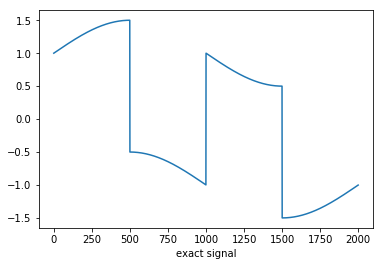

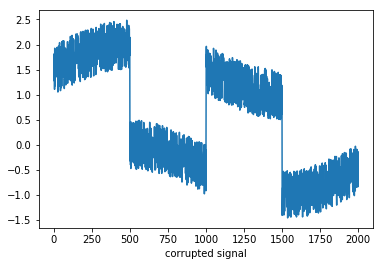

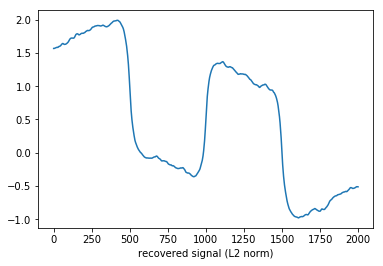

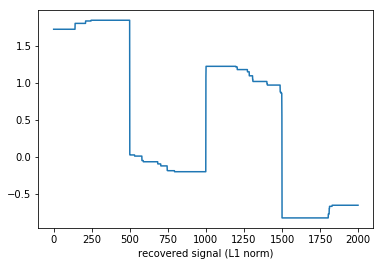

In [5]:
# Exercise 2: signal denoising

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from cvxpy import *
n = 2000;

t = np.linspace(0,n-1,n);
temp = np.ones((np.int((n+1)/4),1));
sig_rect = np.concatenate((temp,-1.0*temp,temp,-1.0*temp),axis=0)
sig_sin = 0.5 * np.sin(2.0*t*math.pi/n);
sig_sin = np.reshape(sig_sin,(n,1));
sig_exact = sig_rect+sig_sin;

noise = np.random.rand(n,1);

sig_corrupted = sig_exact+noise;

plt.figure(1)
plt.plot(sig_exact)
plt.xlabel('exact signal');

plt.figure(2)
plt.plot(sig_corrupted)
plt.xlabel('corrupted signal');

# Create two scalar optimization variables.
x = Variable(n)

# Form objective.
obj_l2 = Minimize(norm(x-sig_corrupted)+10.0*norm((x[0:-1]-x[1:]),2))

# Form and solve problem.
prob_l2 = Problem(obj_l2)
prob_l2.solve(solver='SCS')  # Returns the optimal value.
print ("status:", prob_l2.status)
print ("optimal value", prob_l2.value)
print("optimal var", x.value)

sig_recovered_l2 = x.value;

plt.figure(3)
plt.plot(sig_recovered_l2)
plt.xlabel('recovered signal (L2 norm)');

obj_l1 = Minimize(norm(x-sig_corrupted)+1.0*norm((x[0:-1]-x[1:]),1))

# Form and solve problem.
prob_l1 = Problem(obj_l1)
prob_l1.solve()  # Returns the optimal value.
print("status:", prob_l1.status)
print("optimal value", prob_l1.value)
print("optimal var", x.value)

sig_recovered_l1 = x.value;

plt.figure(4)
plt.plot(sig_recovered_l1)
plt.xlabel('recovered signal (L1 norm)');

In [7]:
# Exercise 3: constrained least squares
from cvxpy import *

import numpy as np

n = 6;
m = 4;

A = np.random.rand(m,n)

b = 5.0*np.random.rand(m,1);

l_bound = np.random.rand(n,1);
u_bound = np.random.rand(n,1)+10.0;

# Create two scalar optimization variables.
x = Variable(n)

# Create two constraints.
constraints = [x >= l_bound,
               x <= u_bound];

# Form objective.
obj_ls = Minimize(norm(A*x - b))

# Form and solve problem.
prob_ls = Problem(obj_ls,constraints)
prob_ls.solve()  # Returns the optimal value.
print "status:", prob_ls.status
print "optimal value", prob_ls.value
print "optimal var", x.value

obj_huber = Minimize(sum(huber(A*x - b)))

prob_huber = Problem(obj_huber,constraints)
prob_huber.solve()  # Returns the optimal value.
print "status:", prob_huber.status
print "optimal value", prob_huber.value
print "optimal var", x.value

status: optimal
optimal value 1.72934866407
optimal var [[ 3.55132315]
 [ 0.54124319]
 [ 0.80534458]
 [ 0.84512104]
 [ 0.81914133]
 [ 0.37110897]]
status: optimal
optimal value 2.71599523256
optimal var [[ 3.48776139]
 [ 0.54124319]
 [ 0.80534458]
 [ 1.03184612]
 [ 0.81914133]
 [ 0.37110897]]
